- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rapport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

## Réalisation de l'ACP

In [5]:
# lecture des données
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

In [8]:
# récupération des données quantitatives
dataNum = data1.iloc[:,1:]
dataNum.head()

id   mois   prot    fat   ash  sodium  carb   cal
0  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67

In [9]:
# récupération de la variable catégorielle
dataCat = data1.iloc[:,0]
dataCat.head()

0    A
1    A
2    A
3    A
4    A
Name: brand, dtype: object

In [11]:
# centrage et réduction des données quantitatives
dataNum = StandardScaler().fit_transform(dataNum)

In [13]:
# réalisation de l'ACP
acp = sklearnPCA(svd_solver='full')
coord = acp.fit_transform(dataNum)

In [17]:
# calcul des valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(dataNum)-1)/len(dataNum)
print(eigval)

[4.17304352e+00 2.29050105e+00 1.00671544e+00 4.07114908e-01
 9.47877372e-02 2.74902961e-02 3.37544062e-04 9.50906385e-06]


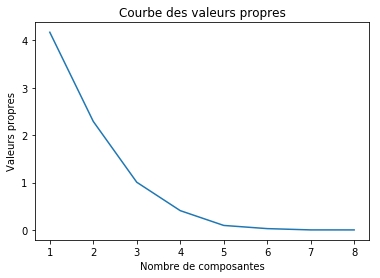

In [18]:
# affichage de la courbe des valeurs propres
plt.plot(np.arange(1,(acp.n_components_)+1),eigval)
plt.title("Courbe des valeurs propres")
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de composantes")
plt.show()

D'après le critère de *Kaiser*, on peut ne considérer que les composantes dont la valeur propre est **supérieure à 1** (données centrées-réduites). On choisit donc de conserver **3 composantes principales**

## Tracé des graphes

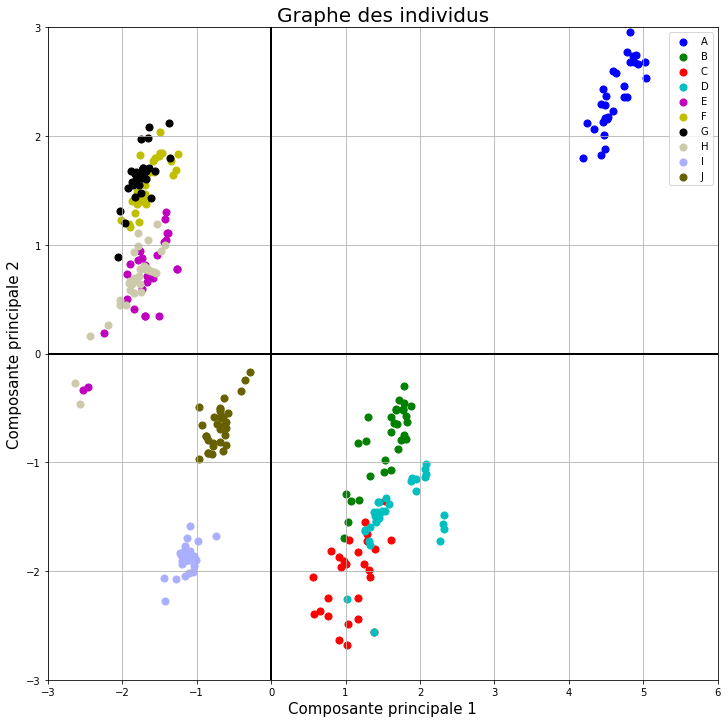

In [82]:
# tracé du graphe des individus
# création du graphe
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-3,6) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée
axes.set_xlabel('Composante principale 1', fontsize = 15)
axes.set_ylabel('Composante principale 2', fontsize = 15)
axes.set_title('Graphe des individus', fontsize = 20)

# ACP sur les 2 premières composantes principales
pca = sklearnPCA(n_components = 2)
pdf = pd.DataFrame(data = pca.fit_transform(dataNum), columns = ['Axe principal 1', 'Axe principal 2'])
fdf = pd.concat([pdf, data1[['brand']]], axis = 1)

# placement des points et marquage suivant la marque
targets = data1.brand.unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#cccaaa', '#aaafff', '#666000']
for target, color in zip(targets,colors):
    indicesToKeep = fdf['brand'] == target
    axes.scatter(fdf.loc[indicesToKeep, 'Axe principal 1']
               , fdf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
axes.legend(targets)
axes.grid()

# ajout des axes et affichage du graphe
plt.plot([-3,6],[0,0],color='black',linestyle='-',linewidth=2)
plt.plot([0,0],[-3,3],color='black',linestyle='-',linewidth=2)
plt.show()

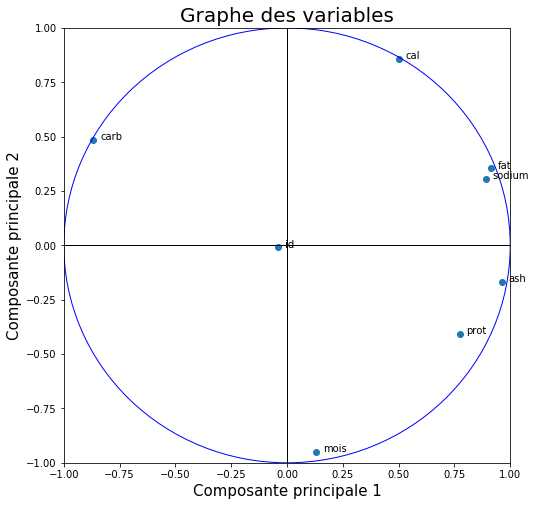

In [62]:
# tracé du graphe des variables
# calcul des corrélation des variables avec les axes
corvar = np.zeros((8,8))
sqrt_eigval = np.sqrt(eigval)
for k in range(8):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

# création du graphe
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
axes.set_xlabel('Composante principale 1', fontsize = 15)
axes.set_ylabel('Composante principale 2', fontsize = 15)
axes.set_title('Graphe des variables', fontsize = 20)

# placement des points
plt.scatter(corvar[:,0],corvar[:,1])

# affichage des étiquettes (noms des variables)
for j in range(8):
     plt.annotate(data1.columns[j+1],(corvar[j,0]+0.03,corvar[j,1]))

# ajouter des axes, du cercle de corrélation et affichage du graphe
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

In [61]:
cos2var = corvar**2
print(pd.DataFrame({'id':data1.columns[1:],'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'SUM':cos2var[:,0] + cos2var[:,1]}))

       id    COS2_1    COS2_2       SUM
0      id  0.001659  0.000078  0.001737
1    mois  0.017349  0.904417  0.921766
2    prot  0.599265  0.166495  0.765760
3     fat  0.831826  0.125650  0.957475
4     ash  0.928954  0.028254  0.957208
5  sodium  0.791646  0.093020  0.884665
6    carb  0.752890  0.235158  0.988048
7     cal  0.249454  0.737430  0.986884


Toutes les variables (sauf *id*) sont bien corrélées sur le plan des deux premières composantes principales. Sur le graphe des variables, elles sont toutes proches du cercle de corrélation (*cercle unité*). On peut en déduire que ce plan permet de bien représenter les données.

## Classification

### Dendrogramme

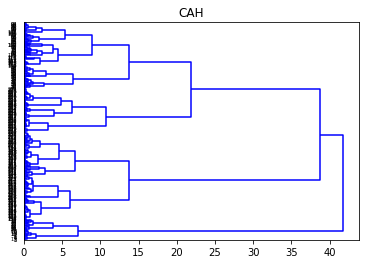

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# génération de la matrice des distances
cah = linkage(dataNum, method='ward', metric='euclidean')

# affichage du dendrogramme
plt.title("CAH")
dendrogram(cah, orientation='right', color_threshold = 0)
plt.show()

### K-means

In [72]:
from sklearn import cluster

# utilisation de la méthode des k-means
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(dataNum)

#index triés des groupes
print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
print(pd.DataFrame(data1.index[idk],kmeans.labels_[idk]))

[9 9 9 9 9 9 9 9 9 9 9 9 9 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 7 3 3 3 7 3 8 8 8 8 8 8 8 8 8 8 8 8 8 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1
 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 5 5 5 5 0 0 0 0 0 0 0 0 5 0 0 0 5
 5 5 5 5 5 5 5 5 5 7 7 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 0 0]
      0
0   299
0   239
0   246
0   247
0   248
0   249
0   250
0   251
0   252
0   253
0   255
0   256
0   257
0   240
0   298
0   241
0   272
0   273
0   270
0   271
1   230
1   178
1   229
1   228
1   174
1   227
1   226
1   225
1   224
1   223
..  ...
8    97
8    98
8    99
8   100
8   101
8   102
8    70
8    69
8    68
8    67
8    66
8    65
8    64
8    63
8    62
8    60
9    1

In [73]:
# calcul des clusters avec le dendrogramme
groupes_cah = fcluster(cah, t=10, criterion='distance')

# comparaison entre les groupes de la CAH et des k-means
pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
1       0   0  15   0   0   0   0   0   0  14
2       0   0   0   0   0   0  59   0   0   0
3       0  61   0   0   0   0   0   0   0   0
4      20   0   0   0   0   0   0   0   0   0
5       0   0   0   0   0  15   0  26   0   0
6       0   0   0  29   0   0   0   2   0   0
7       0   0   0   0  30   0   0   0  29   0

In [74]:
# comparaison entre les groupes de la CAH et les marques
pd.crosstab(groupes_cah,data1.brand)

brand   A   B   C   D   E   F   G   H   I   J
row_0                                        
1      29   0   0   0   0   0   0   0   0   0
2       0   0   0   0  15  13  15  16   0   0
3       0   0   0   0  13  17  14  17   0   0
4       0   0   0   0   0   0   0   0  14   6
5       0   0   0   0   0   0   0   0  15  26
6       0  31   0   0   0   0   0   0   0   0
7       0   0  27  32   0   0   0   0   0   0

In [75]:
# comparaison entre les groupes des k-means et les marques
pd.crosstab(kmeans.labels_,data1.brand)

brand   A   B   C   D   E   F   G   H   I   J
row_0                                        
0       0   0   0   0   0   0   0   0  14   6
1       0   0   0   0  13  17  14  17   0   0
2      15   0   0   0   0   0   0   0   0   0
3       0  29   0   0   0   0   0   0   0   0
4       0   0  14  16   0   0   0   0   0   0
5       0   0   0   0   0   0   0   0  15   0
6       0   0   0   0  15  13  15  16   0   0
7       0   2   0   0   0   0   0   0   0  26
8       0   0  13  16   0   0   0   0   0   0
9      14   0   0   0   0   0   0   0   0   0

On remarque que la *CAH* sépare correctement les quatre premières marques A, B, C et D. Elle a cependant plus de difficultés pour les autres marques. Le classement des *k-means* est beaucoup plus mitigé. Il semble que, sur ce jeu de données, la *CAH* soit plus efficace que les *k-means*.

On a remarqué précédement sur le graphe des individus que les pizzas de la marque **A** sont très séparées des autres pizzas. Il serait effectivement judicieux d'effectuer une nouvelle ACP en excluant les pizzas de cette marque. 

# Partie 2

In [83]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [84]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

In [109]:
datas = data2.iloc[:,:8]
datas.head()

NBG   GC  TD  EPC   IS   IMC     DG  AGE
0    6  148  72   35    0  33.6  0.627   50
1    1   85  66   29    0  26.6  0.351   31
2    8  183  64    0    0  23.3  0.672   32
3    1   89  66   23   94  28.1  0.167   21
4    0  137  40   35  168  43.1  2.288   33

In [107]:
labels = data2.iloc[:,8:]
labels.head()

RESULTAT
0         1
1         0
2         1
3         0
4         1

In [117]:
x_train, x_test, y_train, y_test = train_test_split(datas, labels, test_size = 0.2)

In [134]:
# création du modèle
model = tf.keras.models.Sequential()

# ajout des couches
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

# test du modèle
model_output = model.predict(np.array(x_train[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))

# affichage du modèle
model.summary()

# compilation du modèle
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

[[0.8249513  0.17504872]]
Found :  0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             multiple                  36        
_________________________________________________________________
dense_28 (Dense)             multiple                  40        
_________________________________________________________________
dense_29 (Dense)             multiple                  36        
_________________________________________________________________
dense_30 (Dense)             multiple                  10        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [135]:
# entraînement du modèle
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
491/491 [==============================] - 0s 488us/sample - loss: 0.8135 - acc: 0.5723 - val_loss: 0.6934 - val_acc: 0.6585
Epoch 2/10
491/491 [==============================] - 0s 112us/sample - loss: 0.6942 - acc: 0.6334 - val_loss: 0.6826 - val_acc: 0.6585
Epoch 3/10
491/491 [==============================] - 0s 183us/sample - loss: 0.6865 - acc: 0.6334 - val_loss: 0.6786 - val_acc: 0.6585
Epoch 4/10
491/491 [==============================] - 0s 59us/sample - loss: 0.6828 - acc: 0.6334 - val_loss: 0.6746 - val_acc: 0.6585
Epoch 5/10
491/491 [==============================] - 0s 177us/sample - loss: 0.6791 - acc: 0.6334 - val_loss: 0.6715 - val_acc: 0.6585
Epoch 6/10
491/491 [==============================] - 0s 185us/sample - loss: 0.6763 - acc: 0.6334 - val_loss: 0.6676 - val_acc: 0.6585
Epoch 7/10
491/491 [==============================] - 0s 188us/sample - loss: 0.6734 - acc: 0.6334 - val_loss: 0.6652 - val_acc: 0.6585
Epo

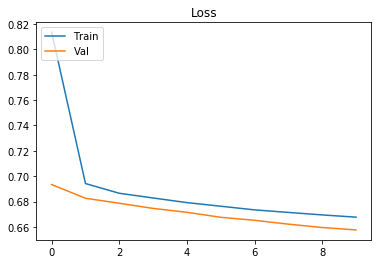

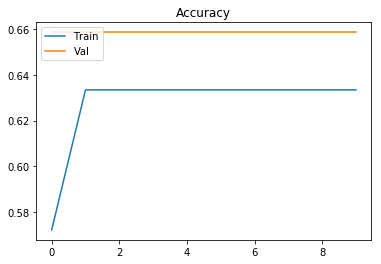

In [136]:
# visualisation des résultats de l'entraînement
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [137]:
# test du modèle
loss, acc = model.evaluate(x_test, y_test)

154/154 [==============================] - 0s 37us/sample - loss: 0.6456 - acc: 0.7013


Le modèle est peu efficace.

### Utiliser ce modèle et comparer

In [138]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# test du modèle
model_output = model.predict(np.array(x_train[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))

# affichage du modèle
model.summary()

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

[[0.48438895]]
Found :  0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             multiple                  108       
_________________________________________________________________
dense_32 (Dense)             multiple                  195       
_________________________________________________________________
dense_33 (Dense)             multiple                  128       
_________________________________________________________________
dense_34 (Dense)             multiple                  90        
_________________________________________________________________
dense_35 (Dense)             multiple                  11        
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________


In [139]:
# entraînement du modèle
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
491/491 [==============================] - 0s 965us/sample - loss: 1.7305 - acc: 0.5173 - val_loss: 1.3517 - val_acc: 0.5610
Epoch 2/10
491/491 [==============================] - 0s 194us/sample - loss: 1.0915 - acc: 0.6436 - val_loss: 0.9733 - val_acc: 0.5854
Epoch 3/10
491/491 [==============================] - 0s 216us/sample - loss: 0.9370 - acc: 0.6232 - val_loss: 0.8730 - val_acc: 0.6667
Epoch 4/10
491/491 [==============================] - 0s 347us/sample - loss: 0.8623 - acc: 0.6517 - val_loss: 0.7687 - val_acc: 0.6829
Epoch 5/10
491/491 [==============================] - 0s 217us/sample - loss: 0.7288 - acc: 0.6334 - val_loss: 0.6246 - val_acc: 0.6911
Epoch 6/10
491/491 [==============================] - 0s 218us/sample - loss: 0.6436 - acc: 0.6497 - val_loss: 0.6206 - val_acc: 0.7073
Epoch 7/10
491/491 [==============================] - 0s 215us/sample - loss: 0.6333 - acc

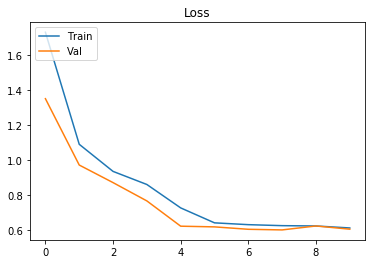

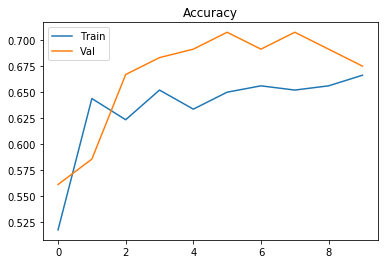

In [140]:
# visualisation des résultats de l'entraînement
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [141]:
# test du modèle
loss, acc = model.evaluate(x_test, y_test)

154/154 [==============================] - 0s 47us/sample - loss: 0.5525 - acc: 0.7273


Le modèle proposé est meilleur que 